<div class="w3-bar w3-blue-grey w3-padding">
    <h2 class="w3-bar-item w3-padding-32"><!-- Text Here --></h2>
    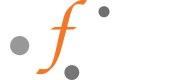
</div>

# A new way of visualising wavefunctions

<div class="w3-panel w3-leftbar w3-border-green w3-pale-green w3-padding-small">
    <h3 id="-Overview%3A%0A"><i class="fa fa-file-o"></i> Overview:
</h3>
    <ul>
<li><strong>Teaching:</strong> 10 min</li>
<li><strong>Exercises:</strong> 30 min</li>
</ul>
<p><strong>Questions</strong></p>
<ul>
<li>Why might widgets not be the best option to visualise data over large ranges?</li>
<li>How do I create a 2D colour plot?</li>
</ul>
<p><strong>Objectives</strong></p>
<ul>
<li>Understand that 2D colour plots allow us to visualisation large ranges of data.</li>
<li>Create a more general function to study square perturbations in infinite wells.</li>
</ul>
</div>

<div class="w3-panel w3-leftbar w3-border-blue w3-pale-blue w3-padding-small">
    <h3 id="-Import-necessary-libraries%0A"><i class="fa fa-info-circle"></i> Import necessary libraries
</h3>
    <p>Alongside previously-imported libraries we will now make use of the <code>cm</code> function from the <code>matplotlib</code> library so that we can access colour schemes which are more intuitive when we make our 2D colour plots.</p>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from ipywidgets import interact, fixed
import ipywidgets as widgets
from matplotlib import cm


e = 1.6 * 10**(-19) #an electron volt
hbar = 1.05 * 10**(-34) 
m =  9.11 * 10**(-31)

L = 10**(-10) #width of the infinite well
w = 0.2*L #width of the perturbation
Nx = 100 #number of x-positions over which we will sample the wavefunction
xstep = L / Nx #step in x values

nmax = 1000 #number of x-positions over which we will sample the square perturbation. Very high for plotting purposes

Vmax = 10000 * e #the maximum perturbation magnitude we will sample
NV = 10 #number of perturbation magnitudes we will sample
Vstep = Vmax / NV #step in perturbation magnitude

## 2D colour plots

Whilst widgets have their uses, they do not always allow us to see obvious trends when we change the input drastically. This is partly because we cannot readily compare two cases directly and, as is the case with the example above, it takes significant periods of time for the plot to adjust given the long computational time to complete each iteration. An alternative method is to produce a 2D colour plot. The example code below allows us to visualise how the wavefunction varies depending on the magnitude of the square perturbation. 

The tricky part with generating 2D colour plots is that we must generate a 2D array, which in this case will store the values of the wavefunction over a range of positions and also for different perturbation magnitudes. The method used below is a 'nested for loop'. In this case the 'inner for loop' iterates over multiple positions for a specific perturbation magnitude and stores these values in an array. The 'outer for loop' iterates over different perturbation mangitudes. Another way would be to calculate the wavefunction for a given position at many different perturbation magnitudes and repeat this process for lots of positions, however the method used in this case seems more intuitive (to me at least!).

Add the functions below to your Jupyter notebook and call them to visualise the wavefunction in a 2D colour plot. Note that it is important to provide a key because the colour schemes can be counter-intuitive!

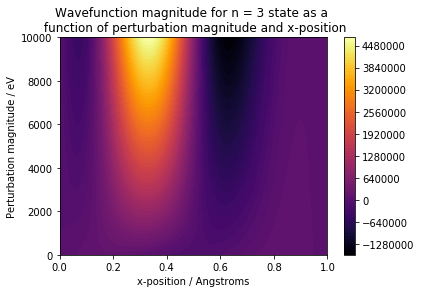

In [2]:
def psi(n, x):
    """
    Computes the value of the n'th wavefunction at a position x, using the analytic solution 
    to the Schrodinger equation for an infinite potential well.
    
    Returns:
        float
            The value of the wavefunction at x
        
    Parameters:
        x : float
            The x coordinate of the system
        
        n : integer
            Describes which state the wavefunction is in
    """
    
    return np.sqrt(2 / L) * np.sin(n * np.pi * x / L)

def energy(n):
    """
    Function to calculate the energy of the particle in an infinite 
    potential well in a particular quantum state
    
    Returns:
        energy : float
                 the energy of the particle in joules
                 
    Parameter:
        n : integer
            the state of the wavefunction
    """
    
    energy = (n**2 * (np.pi)**2 * (hbar**2)) / (2 * m * L**2)
    return energy / e

def integral(n, k, V, w):
    """
    Function to calculate individual integrals, which will later be summed when finding the first-order
    correction to the wavefunction.
    
    Returns:
        perturb_1[0] : float
                       the value of the integral (perturb_1[1] is the estimated error in the integral)
    Parameters:
        n : integer
            principle quantum number
            
        k : integer
            dummy variable. represents the principle quantum number and is what we will sum over in a later function
        
        V : float
            magnitude of the square perturbation
            
        w : float
            width of the square perturbation
    """
    
    if w > L:
        print ("Perturbation width exceeds that of the infinite well. Reduce perturbation width.")
        
    else:
        def integrand(x):
            """
            Function to establish the integrand to be used when calculating the perturbation. Must do this 
            as cannot square the 'psi' function which is previously defined
            """
            
            return V * abs(psi(n, x))**2
        
        perturb_1 = quad(integrand, (L - w) / 2, (L + w) / 2)
        return perturb_1[0] / e
    
def sum_1(n, kmax, V, w):
    """
    Function to store integral values which will later be used to find the value of the corrected wavefunction.
    
    Returns:
        sum_1 : array
                array containing coefficients which will be used to find the corrected wavefunction.
        
    Parameters:
        n : integer
            principle quantum number
            
        kmax : integer
               value of the dummy variable up to which we will sample
        
        V : float
            magnitude of the square perturbation
        
        w : float
            width of the square perturbation
    """
    sum_1 = np.empty(kmax)
    
    for i in range(0, kmax):
        if i == n - 1:
            sum_1[i] = 0
        else:
            value = integral(n, i + 1, V, w) / (energy(n) - energy(i + 1))
            sum_1[i] = value
    
    return sum_1

def psi_V(n, kmax, w):
    """
    Function to find the wavefunction for many perturbations, each with a different magnitude. The function
    finds the value of the wavefunction at each individual position using the equation for the first-order
    corrected wavefunction. This value is then appended to an array containing the wavefunction magnitudes
    for a specific perturbation magnitude so that we have the entire wavefunction for that case. This list
    is then appended to another list containing the wavefunctions for many different perturbation magnitudes
    so that we produce a nested list.
    
    Returns:
        psi : nested array
              inner array contains the values of the wavefunction over an x-range. Outer array contains
              the wavefunction for various perturbation magnitudes.
    
    Parameters:
        n : integer
            principle quantum number
            
        kmax : integer
               value of the dummy variable up to which we will sample
        
        w : float
            width of the square perturbation
    """
    
    #create an empty list to store all wavefunction magnitudes over various x-positions and perturbation magnitudes
    sol = np.empty((NV, Nx)) 
    
    for i in range(0, NV):
        
        for j in range(0, Nx):
            value = 0 #set this to zero for each new position
            elem = sum_1(n, kmax, i * Vstep, w)
            for k in range(0, kmax):
                #sum over all quantum states as specified in the first order wavefunction correction equation
                value += (elem[k] * psi(k + 1, j * xstep)) 
        
            sol[i, j] = value + psi(n, j * xstep) #append wavefunction value for the specific x-position
                    
    return sol

def psi_V_plot(n, kmax, w):
    """
    Function to visualise the wavefunction as a function of position for various perturbation magnitudes.
    
    Returns:
        2d colour plot of the wavefunction as a function of x-position and 
        perturbation magnitude
        
    Parameters:
        n : integer
            principle quantum number
            
        kmax : integer
               value of the dummy variable up to which we will sample
        
        w : float
            width of the square perturbation  
    """
    
    x = np.linspace(0, L / 10**(-10), Nx) #array containing the x-positions over which we have sampled
    V = np.linspace(0, Vmax / e, NV) #array containing the perturbation magnitudes over which we have sampled
    sol = psi_V(n, kmax, w) #nested array containing the wavefunction magnitudes
    
    plt.contourf(x, V, sol, 100, cmap = cm.inferno) #contourf creates a 2d colour plot
    plt.colorbar() #a key showing how colour relates to wavefunction magnitude
    
    #various plot formatting
    plt.xlabel('x-position / Angstroms')
    plt.ylabel('Perturbation magnitude / eV')
    plt.title('Wavefunction magnitude for n = %i state as a \n function of perturbation magnitude and x-position' %n)
    
    plt.show()
    
#sum_1(3, 5, 1000*e, w)
#psi_V(3, 5, w)
psi_V_plot(3, 5, w)

Whilst we do not have quite as clear a view of how the perturbation affects the wavefunction for individual perturbation magnitudes, we can more easily see how the wavefunction is affected by an increasing wavefunction. Does the wavefunction change as you had expected having used widgets to alter the perturbation magnitude?

<div class="w3-panel w3-leftbar w3-border-yellow w3-pale-yellow w3-padding-small">
    <h3 id="-Probability-density-distribution%0A"><i class="fa fa-pencil-square-o"></i> Probability density distribution
</h3>
    <p>Using a similar method to that used above, make a 2D colour plot of the probability density distribution as a function of position and perturbation magnitude.</p>
</div>

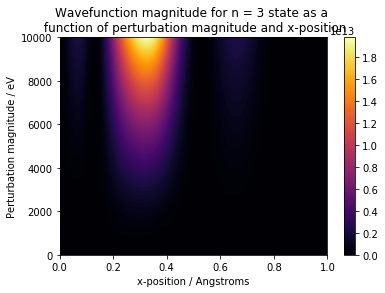

In [3]:
def prob_V(n, kmax, w):
    """
    Similar to the psi_V function shown above. The function finds the probability density distribution for
    many different perturbation magnitudes. Instead of finding the probability density for individual positions, 
    then creating an array containing the probability density distribution, then repeating this for many
    perturbation magnitudes, it simply finds the square of the modulus of each of the elements from the nested 
    array produced by the psi_V function.
    
    Returns : 
        prob : nested array
               Inner array contains the probability distribution. Many probability distributions for different
               perturbation magnitudes form the 2D array.
              
    Parameters:
        n : integer
            principle quantum number
            
        kmax : integer
               value of the dummy variable up to which we will sample
               
        w : float
            width of the square perturbation
    """
    
    prob = np.empty((NV, Nx))
    sol = psi_V(n, kmax, w)
    
    for i in range(0, NV):
        for j in range(0, Nx):
            prob[i, j] = abs(sol[i, j])**2
    
    return prob

def prob_V_plot(n, kmax, w):
    """
    Function to visualise the wavefunction as a function of position for various perturbation magnitudes.
    
    Returns:
        2d colour plot of the probability density distribution as a function of x-position and 
        perturbation magnitude
        
    Parameters:
        n : integer
            principle quantum number
            
        kmax : integer
               value of the dummy variable up to which we will sample
        
        w : float
            width of the square perturbation    
    """
    
    x = np.linspace(0, L / 10**(-10), Nx) #list containing the x-positions over which we have sampled
    V = np.linspace(0, Vmax / e, NV) #list containing the perturbation magnitudes over which we have sampled
    sol = prob_V(n, kmax, w) #nested list containing the wavefunction magnitudes
    
    plt.contourf(x, V, sol, 100, cmap = cm.inferno) #contourf creates a 2d colour plot
    plt.colorbar() #a key showing how colour relates to wavefunction magnitude
    
    #various plot formatting
    plt.xlabel('x-position / Angstroms')
    plt.ylabel('Perturbation magnitude / eV')
    plt.title('Wavefunction magnitude for n = %i state as a \n function of perturbation magnitude and x-position' %n)
    
    plt.show()
    
prob_V_plot(3, 10, w)

<div class="w3-panel w3-leftbar w3-border-yellow w3-pale-yellow w3-padding-small">
    <h3 id="-Non-central-square-perturbation%0A"><i class="fa fa-pencil-square-o"></i> Non-central square perturbation
</h3>
    <p>Whilst it is helpful to visualise how the energy and wavefunction change as a result of this square perturbation, it would be more useful if the square perturbation was made more general. Adjust the arguments of the appropriate functions so that the square perturbation can be any width and lie at any point in the infinite well.</p>
</div>

<div class="w3-panel w3-leftbar w3-border-yellow w3-pale-yellow w3-padding-small">
    <h3 id="-General-perturbation-in-an-infinite-well%0A"><i class="fa fa-pencil-square-o"></i> General perturbation in an infinite well
</h3>
    <p>Now make the code even more general by writing a new function which allows us to have a perturbation of any shape.</p>
</div>

<div class="w3-bar w3-blue-grey">
<a href="./04_ipw_PT_psi.ipynb" class="w3-left-align w3-bar-item w3-button w3-mobile" style="width:33%"><h2><i class="fa fa-angle-double-left"></i> Previous</h2></a>
<a href="./00_schedule.ipynb" class="w3-bar-item w3-button w3-center w3-mobile" style="width:33%"><h2>Schedule</h2></a>
<a href="./99_episode_template.ipynb" class="w3-right-align w3-bar-item w3-button w3-right w3-mobile" style="width:33%"><h2>Next <i class="fa fa-angle-double-right"></i></h2></a>
</div>